# Data Importing and Data Cleaning

In [1]:
# Importing Packages
import json
import csv
import matplotlib.pyplot as plt
import pandas as pd
import jsonlines

The 3 main json files that I will be importing and analyzing for my Capstone Project are the `business`, `review` and `user` files.

### Business File

In [2]:
# Importing Yelp Business JSON File

# Create an empty list to store the JSON data
business_list = []

# Read the JSON file using jsonlines
with jsonlines.open("yelp_academic_dataset_business.json") as reader:
    for obj in reader:
        business_list.append(obj)
        
# Convert the list of JSON objects to a pandas DataFrame
business_df = pd.DataFrame(business_list)        

# Length of rows of Data
print(business_df.shape)

# Display the first few rows of the DataFrame
business_df.head()

(150346, 14)


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [3]:
# Filtering only for businesses that are still open, open = 1, closed = 0
business_df = business_df[business_df['is_open']==1]

### Deciding which City to Focus on

In [4]:
# Top States that have the most number of Businesses in this dataset
top_states = business_df['state'].value_counts().head(10)
top_states

PA    26289
FL    21540
TN     9600
IN     8946
MO     8363
AZ     8108
LA     7676
NJ     7031
NV     6277
AB     4346
Name: state, dtype: int64

The state of Pennsylvania (PA) has the most number of Businesses in this dataset

In [5]:
# Keeping the State of Pennsylvania
states_to_keep = ['PA']
business_df = business_df[business_df.state.isin(states_to_keep)]

# Top Cities in PA
top_cities = business_df['city'].value_counts().head(20)
top_cities

Philadelphia       10540
West Chester         686
Doylestown           445
King of Prussia      393
Bensalem             379
Norristown           355
Exton                332
Lansdale             308
Media                291
Wayne                285
Ardmore              273
Pottstown            272
Langhorne            272
Phoenixville         272
Newtown              271
Springfield          265
Havertown            248
Levittown            245
Willow Grove         243
Warminster           240
Name: city, dtype: int64

In [6]:
# Keeping the State of Pennsylvania
city_to_keep = ['Philadelphia']
business_df = business_df[business_df.city.isin(city_to_keep)]

### Review File

In [7]:
# Importing Yelp Review JSON File

# Create an empty list to store the JSON data
review_list = []

# Read the JSON file using jsonlines
with jsonlines.open("yelp_academic_dataset_review.json") as reader:
    for obj in reader:
        review_list.append(obj)
        
# Convert the list of JSON objects to a pandas DataFrame
review_df = pd.DataFrame(review_list)        

# Length of rows of Data
print(review_df.shape)

# Display the first few rows of the DataFrame
review_df.head()

(6990280, 9)


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


### Filtered reviews dataset in Philly

In [8]:
# Creating a new column for each business's unique ids
business_df['key'] = business_df.iloc[:,0]

# Keeping only the reviews for the restaurants in our selected dataset
philly_reviews = review_df[review_df['business_id'].isin(business_df['key'])]
philly_reviews = philly_reviews.reset_index().iloc[:,2:]
print(philly_reviews.shape)

(744076, 8)


In [9]:
# Splitting Date Column into Year, Month and Time Columns

def create_yr(x): 
    return x.split('-')[0] 

def create_mth(x): 
    return x.split('-')[1] 

def create_time(x):
    return x.split(' ')[1]

philly_reviews['year'] = philly_reviews.date.apply(create_yr)
philly_reviews['month'] = philly_reviews.date.apply(create_mth)
philly_reviews['time'] = philly_reviews.date.apply(create_time)

# Overview of new df with 3 new columns
philly_reviews.head()

,user_id,business_id,stars,useful,funny,cool,text,date,year,month,time
0,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,2015,01,00:01:03
1,Dd1jQj7S-BFGqRbApFzCFw,YtSqYv1Q_pOltsVPSx54SA,5.0,0,0,0,Tremendous service (Big shout out to Douglas) ...,2013-06-24 11:21:25,2013,06,11:21:25
2,IQsF3Rc6IgCzjVV9DE8KXg,eFvzHawVJofxSnD7TgbZtg,5.0,0,0,0,My absolute favorite cafe in the city. Their b...,2014-11-12 15:30:27,2014,11,15:30:27
3,vrKkXsozqqecF3CW4cGaVQ,rjuWz_AD3WfXJc03AhIO_w,5.0,2,2,2,I thoroughly enjoyed the show. Chill way to s...,2012-12-04 16:46:20,2012,12,16:46:20
4,aFa96pz67TwOFu4Weq5Agg,kq5Ghhh14r-eCxlVmlyd8w,5.0,0,0,0,My boyfriend and I tried this deli for the fir...,2018-08-23 21:39:38,2018,08,21:39:38


In [10]:
# Number of Unique Users in this Reviews Dataset
n_users = len(philly_reviews.user_id.unique())
n_users

245875

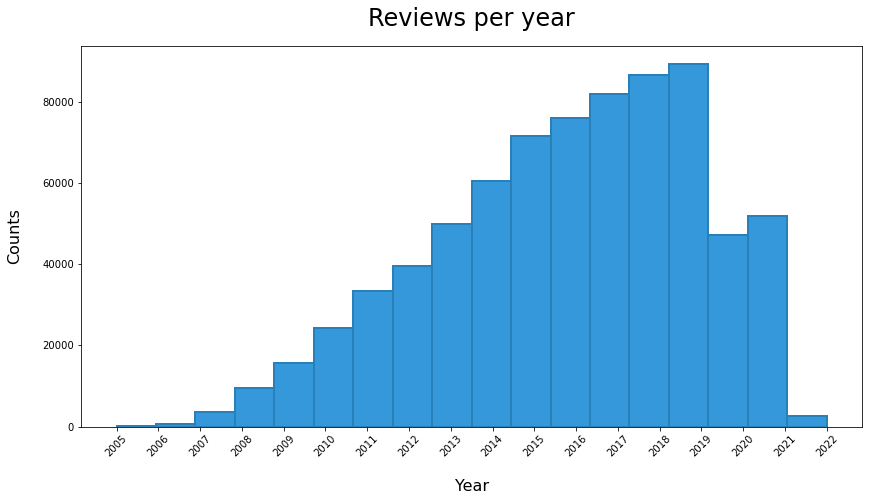

In [11]:
# Histogram plot of Restaurant Reviews per Year
reviews_sorted = philly_reviews.sort_values(by='year', ascending=True)

def make_histogram(dataset, attribute, bins=18, bar_color='#3498db', edge_color='#2980b9', title='Title', x='X', y='Y', sort_index=False):
    fig, ax = plt.subplots(figsize=(14, 7))
    ax.set_title(title, fontsize=24, pad=20)
    ax.set_xlabel(x, fontsize=16, labelpad=20)
    ax.set_ylabel(y, fontsize=16, labelpad=20)
    
    plt.hist(dataset[attribute], bins=bins, color=bar_color, ec=edge_color, linewidth=2) 
    plt.xticks(rotation=45)
    
make_histogram(reviews_sorted, 'year', title='Reviews per year', x='Year', y='Counts')

The histogram has a left-skewed distribution with a drop in reviews in 2020 (due to COVID-19). I will only be analyzing reviews from the **past 8 years** for the sake of this capstone project.

In [12]:
# Filtering for Reviews from 2015-2022
philly_reviews['year'] = philly_reviews['year'].astype(int)
philly_reviews = philly_reviews[philly_reviews['year'] >= 2015]

# Overview of our Final Reviews Dataset
print(philly_reviews.shape)

(507252, 11)


In [13]:
# Checking for Null Values
philly_reviews.isnull().sum()

user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
year           0
month          0
time           0
dtype: int64

### User File

In [14]:
# Importing Yelp User JSON File

# Create an empty list to store the JSON data
user_list = []

# Read the JSON file using jsonlines
with jsonlines.open("yelp_academic_dataset_user.json") as reader:
    for obj in reader:
        user_list.append(obj)
        
# Convert the list of JSON objects to a pandas DataFrame
user_df = pd.DataFrame(user_list)        

# Length of rows of Data
print(user_df.shape)

# Display the first few rows of the DataFrame
user_df.head()

(1987897, 22)


,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0


In [15]:
# Filtering for Active Yelp Users who have completed at least 5 reviews
user_df = user_df[user_df['review_count'] >= 5]

# Overview of our JSON Dataframe
print(user_df.shape)
user_df.sample(10)

(1087094, 22)


,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
687372,AmU9z_y2zGiAcTH5PhpBkg,Sheldon,7,2016-12-03 19:26:06,11,2,1,,"8QruJP65LgaCicpqtIc_5g, n9ohTC6NV0Ki1fOdMiIAgw",0,...,0,0,0,0,0,0,0,0,0,0
1455295,Mt1c4rYAYUNtYa-__rbCyw,Diana,5,2016-04-15 14:51:03,1,0,0,,"yk9EzHJLcY4OieVectj9AQ, 22Xtj2AoMkLL8X-kJX1Ezg...",0,...,0,0,0,0,0,0,0,0,0,0
530424,HStXcx0Fyb96ulOE2CWKrQ,Ryan,5,2018-09-01 22:01:22,1,0,1,,None,0,...,0,0,0,0,0,0,0,0,0,0
539385,8-kS6mdJgn8ckn9ARsZVqA,Asna,8,2019-08-30 03:47:38,1,0,0,,None,0,...,0,0,0,0,0,0,0,0,0,0
1781516,gq_aFI6utl8NfNiD-ABzpw,Jane S,5,2012-09-21 17:03:18,0,0,0,,None,0,...,0,0,0,0,0,0,0,0,0,0
340623,LF7rJ0Bv2TFZEVGXaEjRew,Kittie,11,2012-08-25 02:00:41,4,1,0,,None,0,...,0,0,0,0,1,0,0,0,0,0
1568886,9XI6EOH1X1wPMQaEmSWwvg,David,8,2012-10-20 22:18:48,3,1,2,,None,0,...,0,0,0,0,0,0,0,0,0,0
709963,sR0P33XAOsKSs9UWa1XW7g,Tracy,26,2017-06-22 20:13:40,9,0,1,,None,0,...,0,0,0,0,0,0,0,0,0,0
1013681,boUZ__oUD_93o0RMmtxtqQ,xie,29,2008-07-12 02:56:09,29,2,9,,"HSj1wLqqPaswkyzZM9-lFg, -ex7ianKnfT2X_diYCsziA...",2,...,0,0,0,0,2,0,1,1,0,0
482264,dJqIDe40YpjcyOTOdXP5og,Thomas,101,2017-05-31 00:52:56,122,16,92,"2018,2019,20,20,2021","tdSgcHyIirwQjMMqWT7QIQ, 9aPhTC34PILldShZHzPi5g...",4,...,1,1,0,0,17,7,7,7,4,2


In [16]:
# Number of unique active users
n_users = len(user_df.user_id.unique())
n_users 

1087094